In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/all_weekly_excess_deaths.csv')

In [3]:
df1 = df.copy()

In [4]:
df1.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,0,2932.039560,-18.039560,2914.0,0.0,-0.069594,-0.006153
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,0,2940.372893,66.627107,3007.0,0.0,0.257038,0.022659
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,0,2900.039560,9.960440,2910.0,0.0,0.038426,0.003435


In [5]:
df1.shape

(5770, 17)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   5770 non-null   object 
 1   region                    5770 non-null   object 
 2   region_code               5770 non-null   int64  
 3   start_date                5770 non-null   object 
 4   end_date                  5770 non-null   object 
 5   days                      5770 non-null   int64  
 6   year                      5770 non-null   int64  
 7   week                      5770 non-null   int64  
 8   population                5770 non-null   int64  
 9   total_deaths              5770 non-null   float64
 10  covid_deaths              5770 non-null   int64  
 11  expected_deaths           5770 non-null   float64
 12  excess_deaths             5770 non-null   float64
 13  non_covid_deaths          5770 non-null   float64
 14  covid_de

In [7]:
df1.isnull().sum()

,0
country,0
region,0
region_code,0
start_date,0
end_date,0
days,0
year,0
week,0
population,0
total_deaths,0


In [8]:
df1.duplicated().sum()

0

In [9]:
df1.describe()

,region_code,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
count,5770.0,5770.0,5770.000000,5770.000000,5.770000e+03,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,0.0,7.0,2020.750433,24.220624,3.120102e+07,5697.674385,586.102426,4925.623684,772.050700,5111.571958,1.779043,2.341445,0.142107
std,0.0,0.0,0.730038,15.089277,5.401340e+07,10510.772931,1653.624735,8940.263278,2334.268651,9220.806975,2.629101,4.210041,0.255349
min,0.0,7.0,2020.000000,1.000000,3.703350e+05,28.000000,0.000000,36.958708,-3884.712360,28.000000,0.000000,-8.776743,-0.390527
25%,0.0,7.0,2020.000000,11.000000,5.403021e+06,953.250000,7.000000,867.375983,-0.516362,882.000000,0.112374,-0.009925,-0.000743
50%,0.0,7.0,2021.000000,22.000000,1.046710e+07,2203.850000,71.000000,1978.483427,100.641011,2042.500000,0.719079,1.144515,0.071504
75%,0.0,7.0,2021.000000,37.000000,3.830773e+07,6433.250000,405.750000,5687.962381,553.124692,5840.750000,2.339688,3.192287,0.193627
max,0.0,7.0,2022.000000,53.000000,3.369976e+08,87417.000000,23386.000000,64029.902966,28233.523876,70577.000000,19.562486,38.801037,3.782780


# **Now data looks neat and clean. So we can move forward to the analysis part.**

In [10]:
matrix_corr = df1.corr(numeric_only=True)
matrix_corr

,region_code,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
region_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,1.000000,-0.290517,0.006371,0.008856,0.019118,0.016534,-0.023452,0.006666,0.093511,0.026039,0.001724
week,NaN,NaN,-0.290517,1.000000,-0.000475,0.001421,0.003097,-0.020945,0.086619,0.001064,0.043073,0.219571,0.179856
population,NaN,NaN,0.006371,-0.000475,1.000000,0.969000,0.719008,0.975199,0.628209,0.975616,0.021850,0.018251,0.071869
total_deaths,NaN,NaN,0.008856,0.001421,0.969000,1.000000,0.810878,0.984131,0.733583,0.994477,0.108389,0.110033,0.136795
covid_deaths,NaN,NaN,0.019118,0.003097,0.719008,0.810878,1.000000,0.725315,0.873272,0.744982,0.366224,0.292377,0.350401
expected_deaths,NaN,NaN,0.016534,-0.020945,0.975199,0.984131,0.725315,1.000000,0.601353,0.991734,0.040882,0.019097,0.031582
excess_deaths,NaN,NaN,-0.023452,0.086619,0.628209,0.733583,0.873272,0.601353,1.000000,0.679599,0.331478,0.422316,0.495002
non_covid_deaths,NaN,NaN,0.006666,0.001064,0.975616,0.994477,0.744982,0.991734,0.679599,1.000000,0.057876,0.072992,0.093092


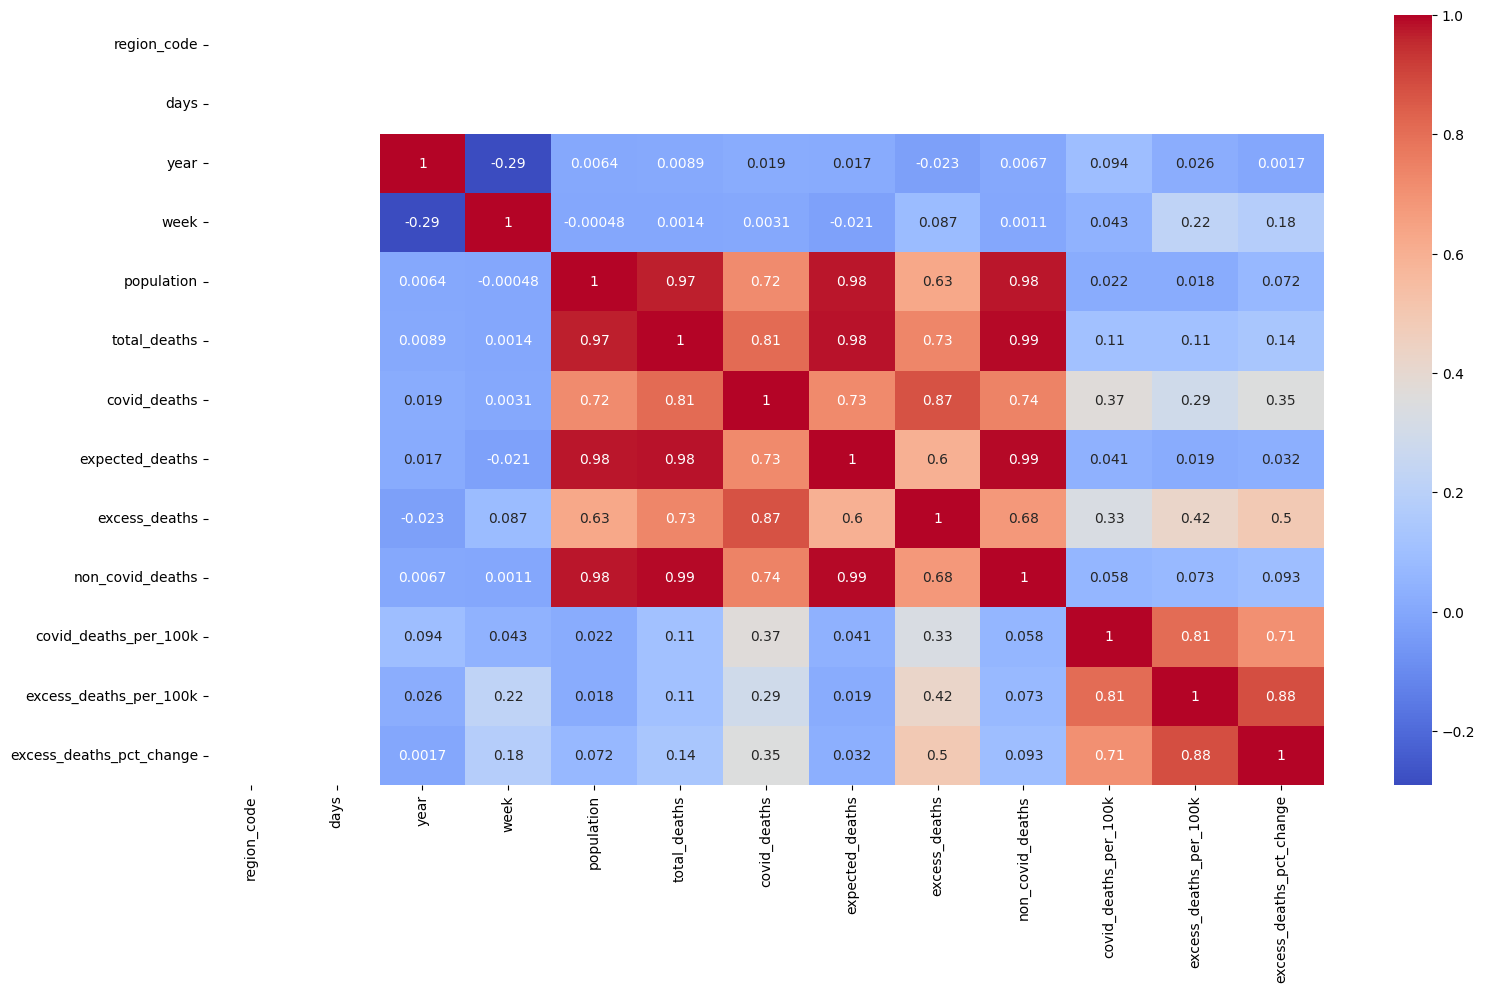

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm')
plt.show()

In [12]:
df1.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,0,2932.039560,-18.039560,2914.0,0.0,-0.069594,-0.006153
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,0,2940.372893,66.627107,3007.0,0.0,0.257038,0.022659
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,0,2900.039560,9.960440,2910.0,0.0,0.038426,0.003435


In [13]:
country_total_deaths = df1.groupby('country')['total_deaths'].sum().sort_values(ascending=False).head(10).astype(int)
country_total_deaths

,total_deaths
country,
United States,8407409
Germany,2529149
Mexico,2503250
Italy,1707936
Britain,1691666
South Africa,1614666
France,1599319
Iran,1260978
Poland,1227358


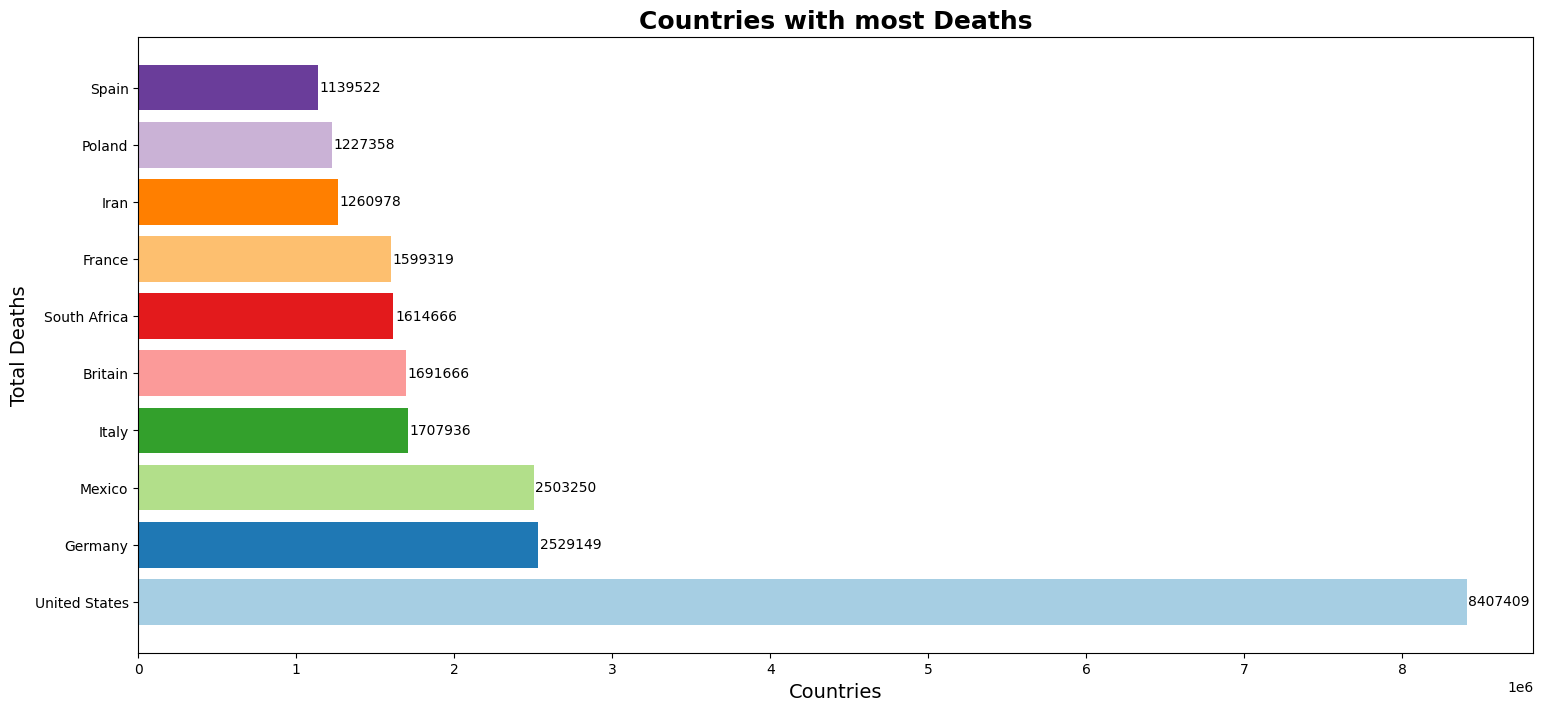

In [14]:
plt.figure(figsize=(18, 8))
plt.barh(country_total_deaths.index, country_total_deaths.values, color=plt.cm.Paired.colors)
plt.title('Countries with most Deaths', fontsize=18, fontweight='bold')
for i, value in enumerate(country_total_deaths.values):
    plt.text(value + 10000, i, str(value), ha='left', va='center')
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [15]:
region_total_deaths = df1.groupby('region')['total_deaths'].sum().sort_values(ascending=False).head(10)
region_total_deaths

,total_deaths
region,
United States,8407409.0
Germany,2529149.0
Mexico,2503250.0
Italy,1707936.0
Britain,1691666.0
South Africa,1614666.0
France,1599319.0
Iran,1260978.7
Poland,1227358.0


In [16]:
df1['region_code'].value_counts()

,count
region_code,
0,5770


In [17]:
most_deaths_on_start_date = df1.groupby('start_date')['total_deaths'].sum().sort_values(ascending=False).head(10)
most_deaths_on_start_date

,total_deaths
start_date,
2021-01-18,299134.7
2021-01-11,297868.1
2021-01-04,289035.7
2020-12-28,282017.8
2021-01-25,280570.5
2020-12-21,276425.3
2020-12-14,273725.9
2020-12-07,273540.8
2022-01-24,272345.5


In [18]:
most_deaths_on_end_date = df1.groupby('end_date')['total_deaths'].sum().sort_values(ascending=False).head(10)
most_deaths_on_end_date

,total_deaths
end_date,
2021-01-24,299134.7
2021-01-17,297868.1
2021-01-10,289035.7
2021-01-03,282017.8
2021-01-31,280570.5
2020-12-27,276425.3
2020-12-20,273725.9
2020-12-13,273540.8
2022-01-30,272345.5


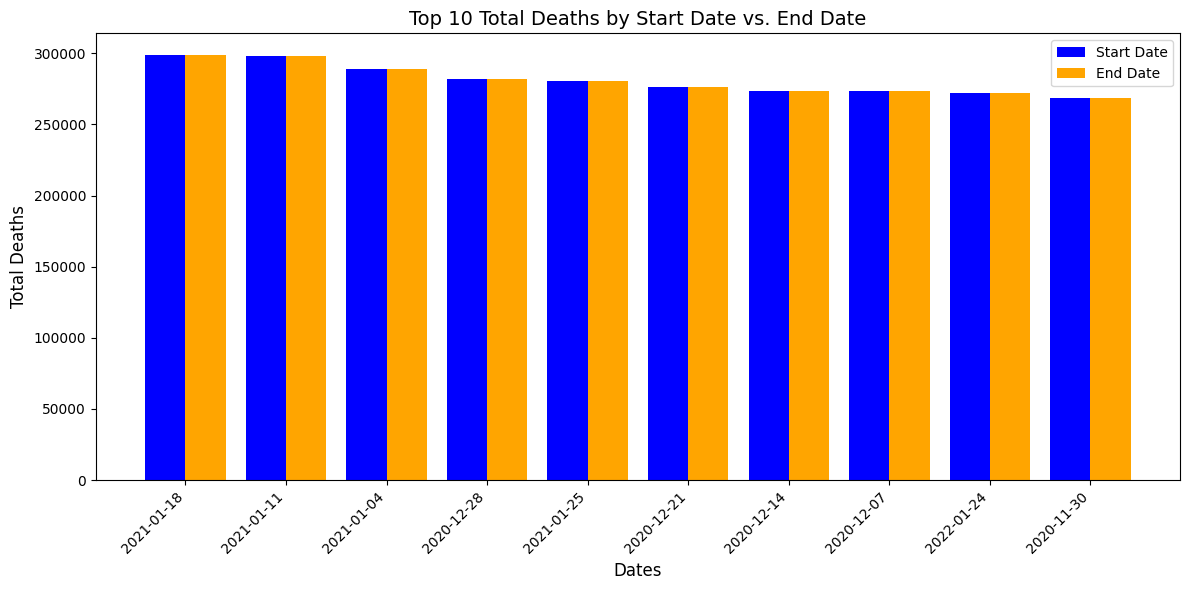

In [19]:
# Convert the Series into DataFrames for alignment
start_date_data = most_deaths_on_start_date.reset_index()
end_date_data = most_deaths_on_end_date.reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4

start_positions = range(len(start_date_data))
end_positions = [x + bar_width for x in start_positions]

ax.bar(start_positions, start_date_data['total_deaths'], width=bar_width, label='Start Date', color='blue')

ax.bar(end_positions, end_date_data['total_deaths'], width=bar_width, label='End Date', color='orange')

ax.set_xlabel('Dates', fontsize=12)
ax.set_ylabel('Total Deaths', fontsize=12)
ax.set_title('Top 10 Total Deaths by Start Date vs. End Date', fontsize=14)

ax.set_xticks([x + bar_width / 2 for x in start_positions])
ax.set_xticklabels(start_date_data['start_date'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [20]:
df1['duration'] = pd.to_datetime(df1['end_date']) - pd.to_datetime(df['start_date'])
df1['duration'] = df1['duration'].dt.days + 1
df1.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,duration
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278,7
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447,7
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,0,2932.039560,-18.039560,2914.0,0.0,-0.069594,-0.006153,7
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,0,2940.372893,66.627107,3007.0,0.0,0.257038,0.022659,7
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,0,2900.039560,9.960440,2910.0,0.0,0.038426,0.003435,7


In [21]:
df1['duration'].value_counts()

,count
duration,
7,5770


In [22]:
df1['year'].value_counts()

,count
year,
2020,2437
2021,2336
2022,997


In [23]:
yearly_deaths = df1.groupby('year')['total_deaths'].sum()
yearly_deaths

,total_deaths
year,
2020,13508662.8
2021,13670896.9
2022,5696021.5


Text(0, 0.5, 'Total Deaths')

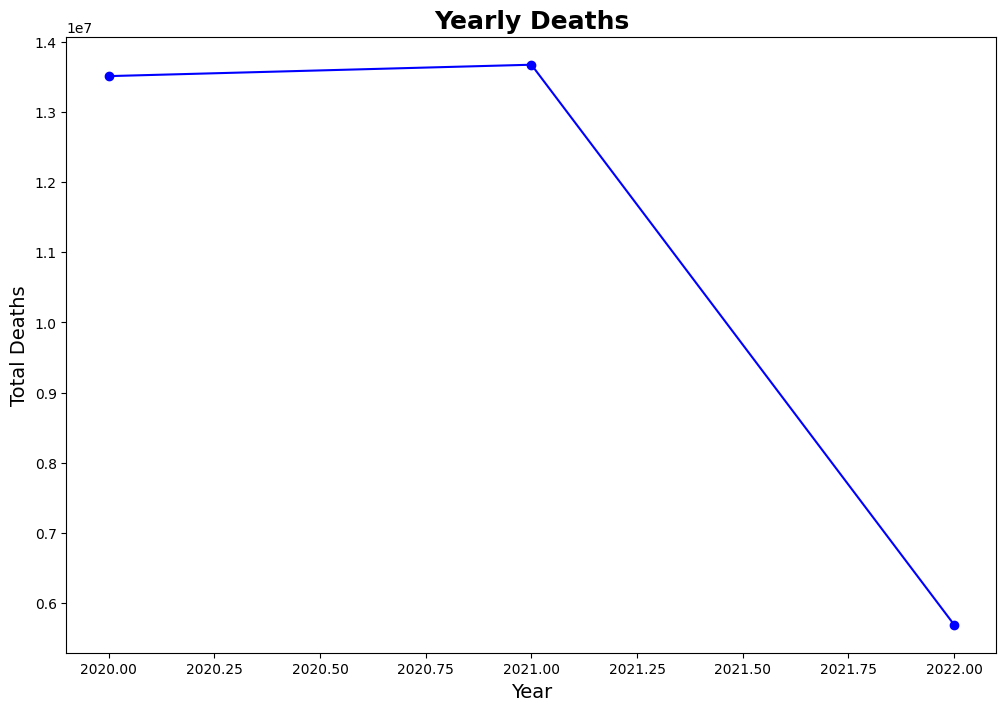

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Deaths', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)

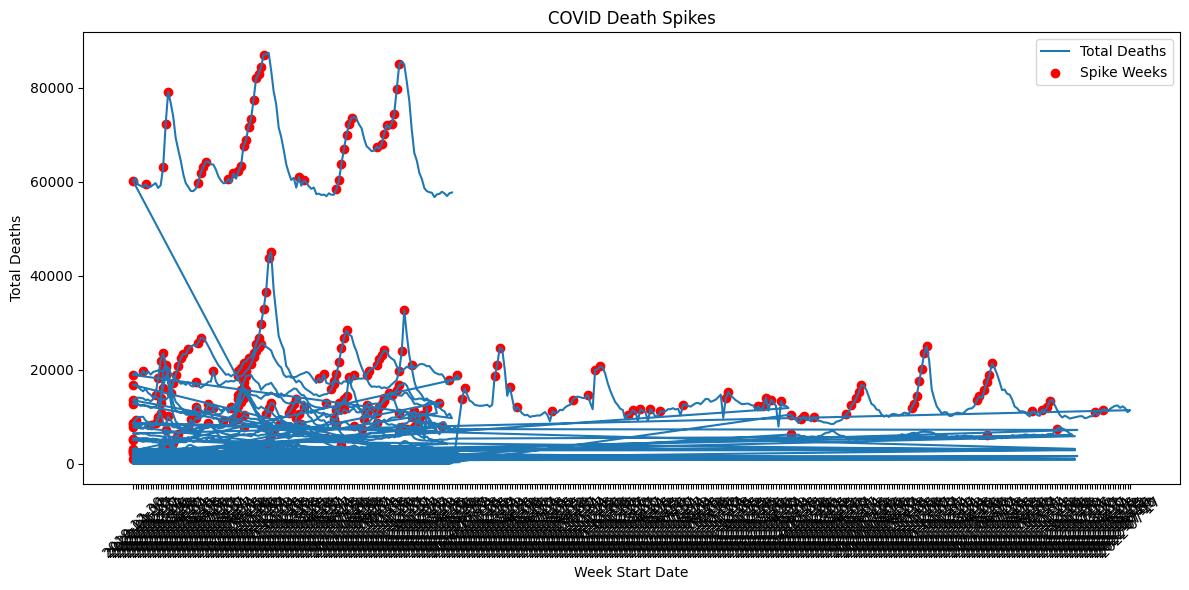

In [25]:
df1['weekly_death_change'] = df1['total_deaths'].diff()
spike_threshold = df1['weekly_death_change'].quantile(0.95)
spike_weeks = df1[df1['weekly_death_change'] > spike_threshold]
plt.figure(figsize=(12, 6))
plt.plot(df1['start_date'], df1['total_deaths'], label='Total Deaths')
plt.scatter(spike_weeks['start_date'], spike_weeks['total_deaths'], color='red', label='Spike Weeks')
plt.xlabel('Week Start Date')
plt.ylabel('Total Deaths')
plt.title('COVID Death Spikes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
df1['covid_deaths'].value_counts()

,count
covid_deaths,
0,825
1,159
2,114
4,88
3,75
...,...
217,1
445,1
659,1


week
4    117862
5    112337
3    112190
2    107995
6    105124
Name: covid_deaths, dtype: int64


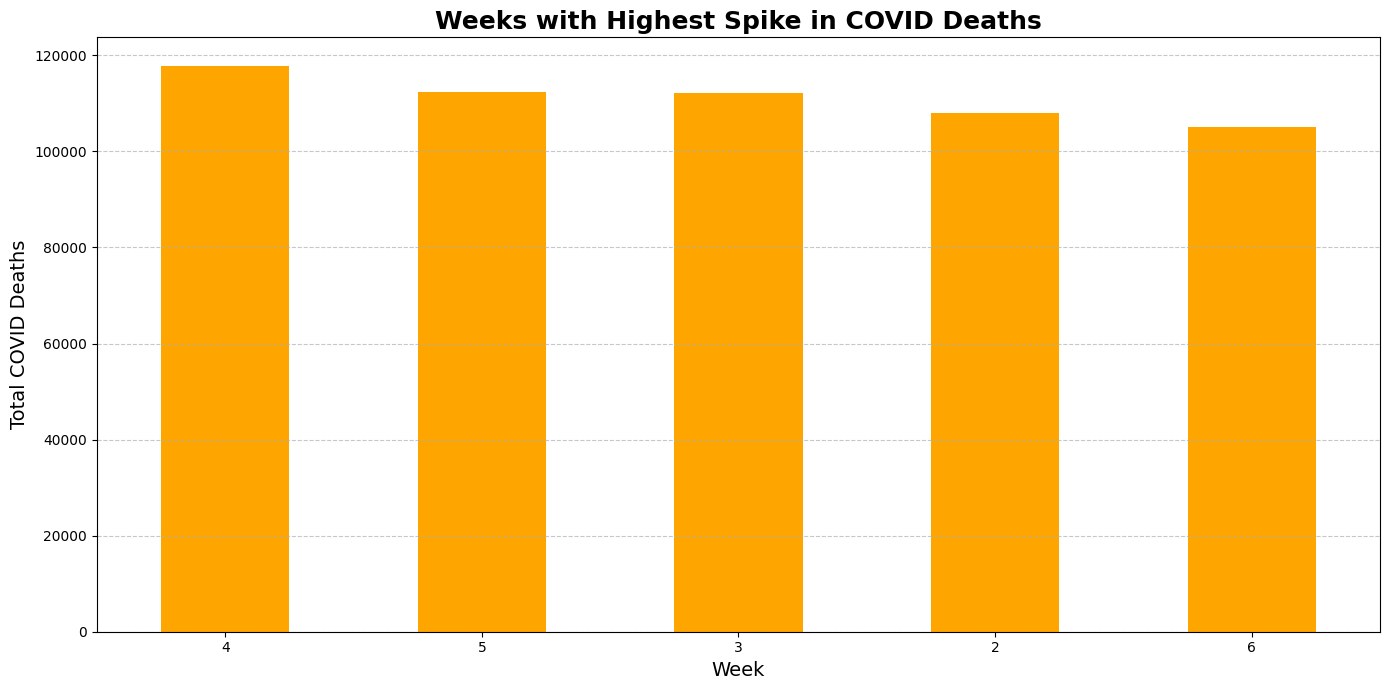

In [27]:
weekly_covid_deaths = df1.groupby('week')['covid_deaths'].sum().sort_values(ascending=False)

top_spike_weeks = weekly_covid_deaths.head(5)
print(top_spike_weeks)

# Visualization: Highlight weeks with the highest spike
plt.figure(figsize=(14, 7))
top_spike_weeks.plot(kind='bar', color='orange')
plt.title('Weeks with Highest Spike in COVID Deaths', fontsize=18, fontweight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Total COVID Deaths', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
df1.head(2)

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,duration,weekly_death_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278,7,NaN
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447,7,-24.0


In [29]:
population_deaths = df1.groupby('population')['total_deaths'].sum().sort_values(ascending=False)
population_deaths

,total_deaths
population,
336997624,8407409.0
83408554,2529149.0
126705138,2503250.0
59240330,1707936.0
67281040,1691666.0
59392255,1614666.0
67422000,1599319.0
87923432,1260978.7
38307726,1227358.0


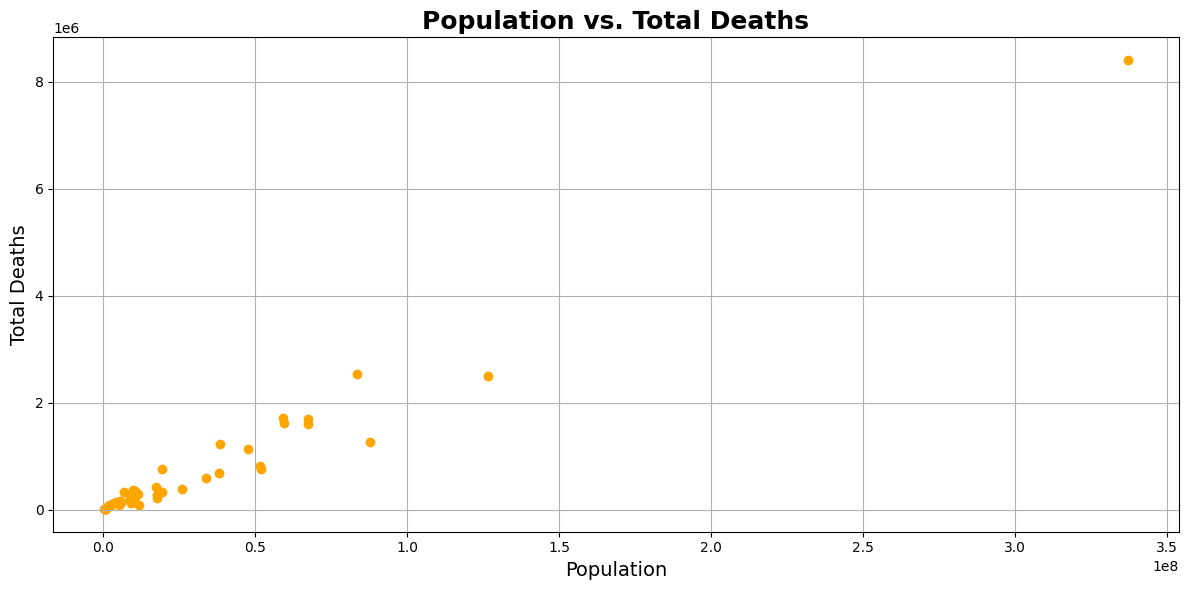

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(population_deaths.index, population_deaths.values, color='orange')
plt.title('Population vs. Total Deaths', fontsize=18, fontweight='bold')
plt.xlabel('Population', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
df1.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,duration,weekly_death_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278,7,NaN
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447,7,-24.0
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,0,2932.039560,-18.039560,2914.0,0.0,-0.069594,-0.006153,7,12.0
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,0,2940.372893,66.627107,3007.0,0.0,0.257038,0.022659,7,93.0
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,0,2900.039560,9.960440,2910.0,0.0,0.038426,0.003435,7,-97.0


In [32]:
df1['covid_death_percentage'] = df1['covid_deaths'] / df1['total_deaths'] * 100
df1['covid_death_percentage']

,covid_death_percentage
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
5765,3.228259
5766,4.278289
5767,4.576976
5768,3.399079


In [33]:
country_covid_deaths_sum = df1.groupby('country')['covid_deaths'].sum().sort_values(ascending=False).head()
country_covid_deaths_sum

,covid_deaths
country,
United States,1011492
Mexico,317420
Peru,214421
Britain,176528
Italy,163643


In [34]:
df1['non_covid_deaths'] = df1['total_deaths'] - df1['covid_deaths']

country_deaths = df1.groupby('country')[['covid_deaths', 'non_covid_deaths']].sum()

top_5_countries = country_deaths.sort_values(by='covid_deaths', ascending=False).head(5)

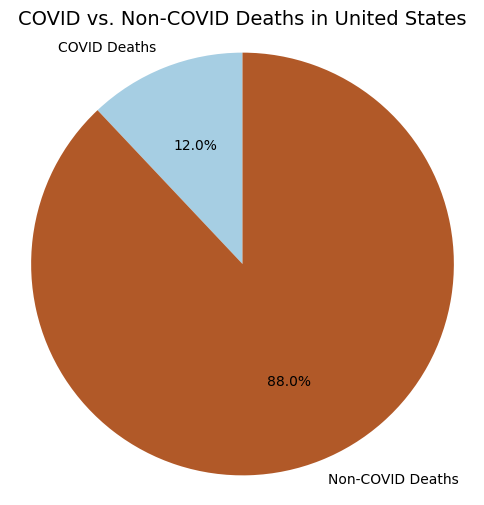

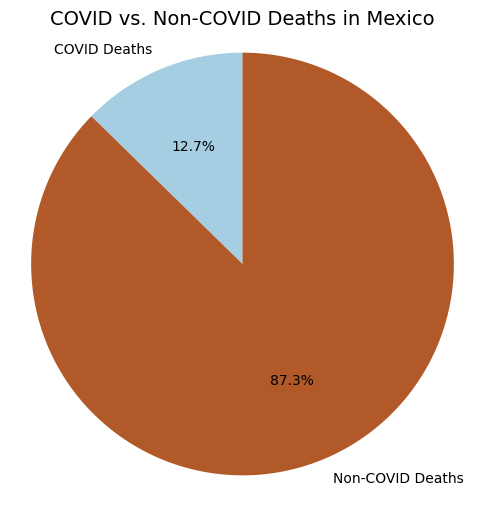

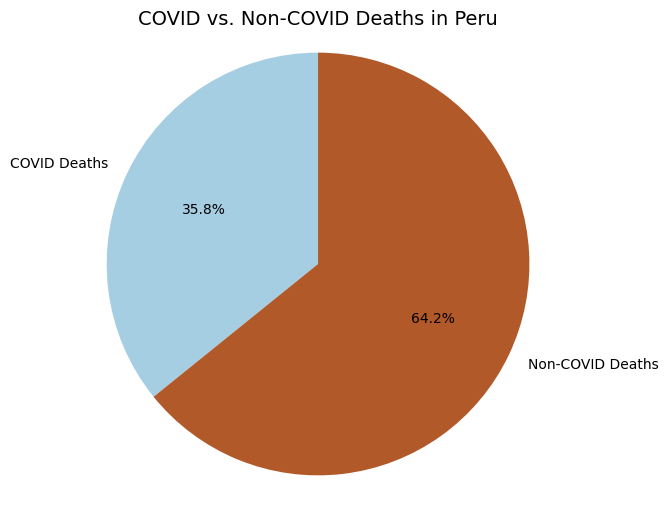

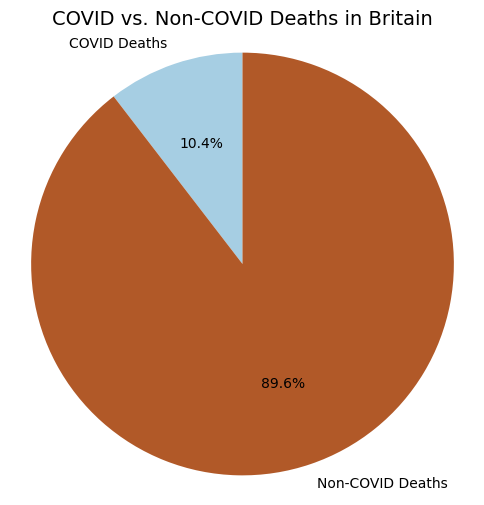

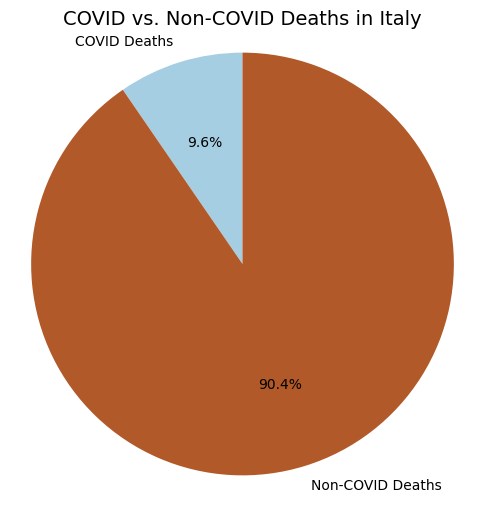

In [35]:
for country in top_5_countries.index:
    covid_deaths = top_5_countries.loc[country, 'covid_deaths']
    non_covid_deaths = top_5_countries.loc[country, 'non_covid_deaths']

    labels = ['COVID Deaths', 'Non-COVID Deaths']
    sizes = [covid_deaths, non_covid_deaths]
    colors = plt.cm.Paired(np.linspace(0, 1, len(sizes)))

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'COVID vs. Non-COVID Deaths in {country}', fontsize=14)
    plt.axis('equal')
    plt.show()

In [36]:
df1['discrepancy'] = df1['total_deaths'] - df1['expected_deaths']

In [37]:
region_discrepancy = df1.groupby('region')['discrepancy'].sum().sort_values(ascending=False)

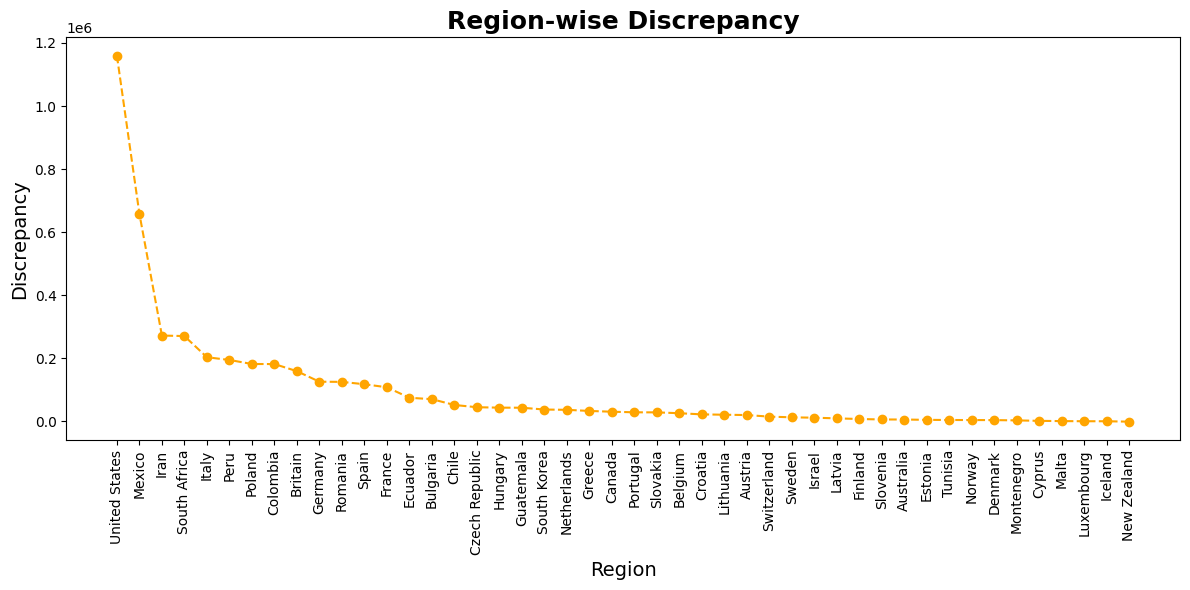

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(region_discrepancy.index, region_discrepancy.values, color='orange', marker='o', linestyle='--')
plt.title('Region-wise Discrepancy', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Discrepancy', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [39]:
df1.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,...,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,duration,weekly_death_change,covid_death_percentage,discrepancy
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,...,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278,7,NaN,0.0,-39.372893
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,...,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447,7,-24.0,0.0,-54.539560
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,...,2932.039560,-18.039560,2914.0,0.0,-0.069594,-0.006153,7,12.0,0.0,-18.039560
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,...,2940.372893,66.627107,3007.0,0.0,0.257038,0.022659,7,93.0,0.0,66.627107
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,...,2900.039560,9.960440,2910.0,0.0,0.038426,0.003435,7,-97.0,0.0,9.960440


In [40]:
region_excess_deaths = df1.groupby('region')['excess_deaths'].sum().sort_values(ascending=False)

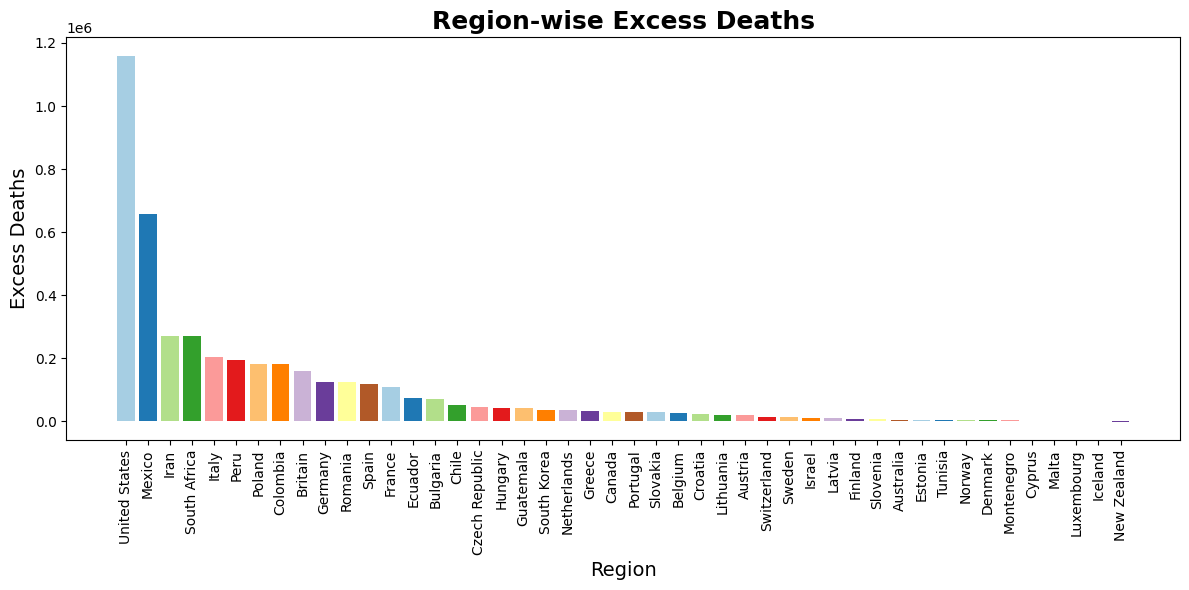

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(region_excess_deaths.index, region_excess_deaths.values, color=plt.cm.Paired.colors)
plt.title('Region-wise Excess Deaths', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Excess Deaths', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
heatmap_data = df1.pivot_table(index='region', columns='week', values='excess_deaths', aggfunc='sum').head(5)

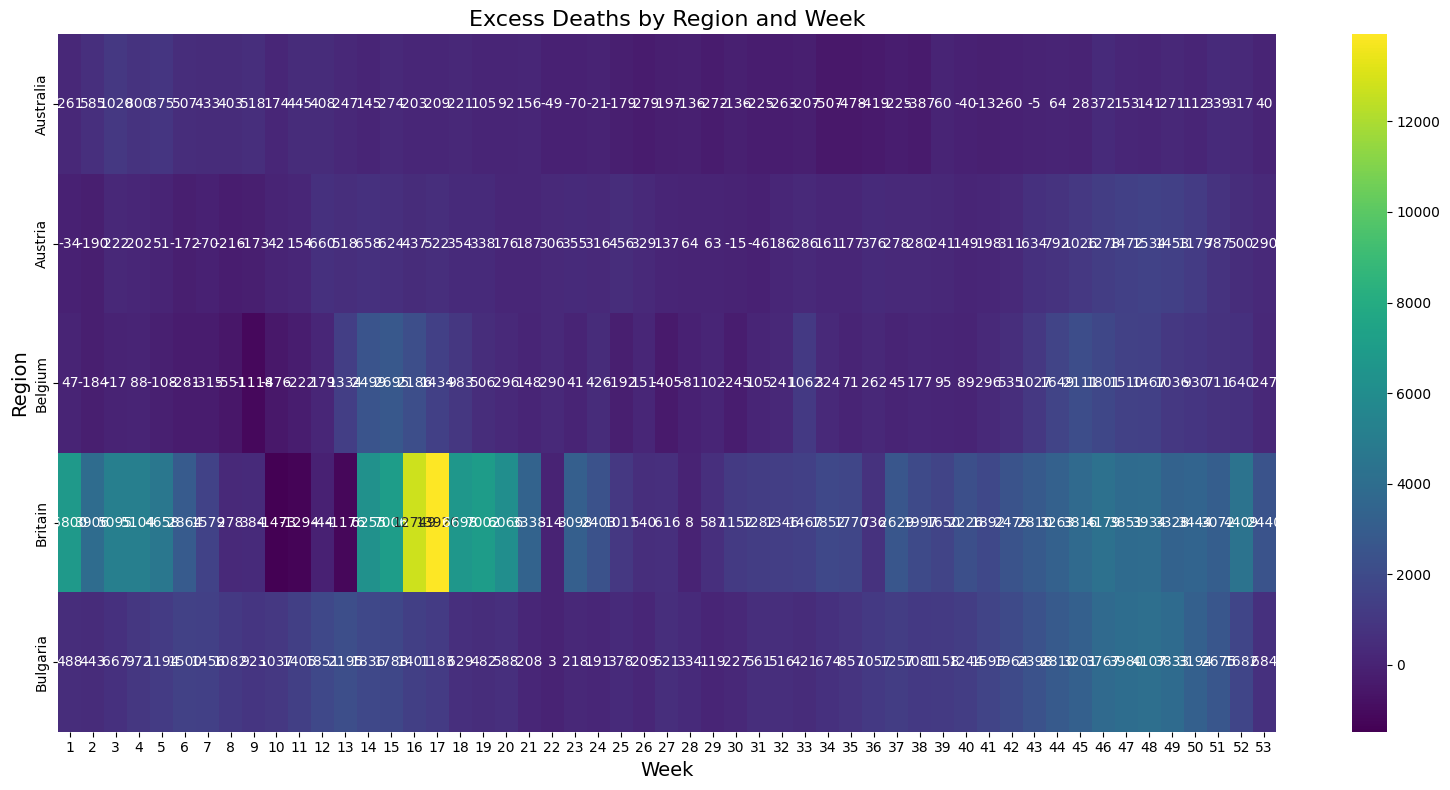

In [43]:
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Excess Deaths by Region and Week', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
df1['non_covid_deaths'] = df1['total_deaths'] - df1['covid_deaths']

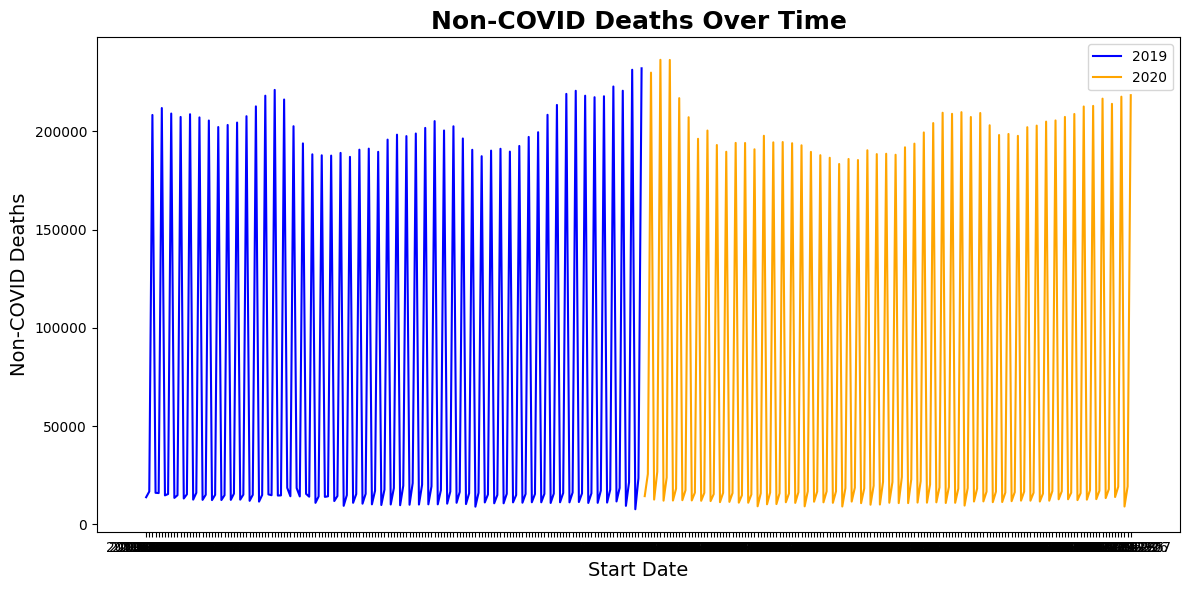

In [45]:
df_2020 = df1[df1['year'] == 2020]
df_2021 = df1[df1['year'] == 2021]

non_covid_deaths_2020 = df_2020.groupby('start_date')['non_covid_deaths'].sum()
non_covid_deaths_2021 = df_2021.groupby('start_date')['non_covid_deaths'].sum()

plt.figure(figsize=(12, 6))
plt.plot(non_covid_deaths_2020.index, non_covid_deaths_2020.values, label='2019', color='blue')
plt.plot(non_covid_deaths_2021.index, non_covid_deaths_2021.values, label='2020', color='orange')
plt.title('Non-COVID Deaths Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Start Date', fontsize=14)
plt.ylabel('Non-COVID Deaths', fontsize=14)
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df1['covid_deaths_per_100k'] = (df1['covid_deaths'] / df1['population']) * 100000

country_covid_deaths_per_100k = df1.groupby('country')['covid_deaths_per_100k'].max().sort_values(ascending=False)
top_10 = country_covid_deaths_per_100k.head(10)
top_10

,covid_deaths_per_100k
country,
Portugal,19.562486
Belgium,18.542090
Hungary,18.198135
Peru,17.686242
Bulgaria,17.499609
Slovenia,16.985859
Romania,15.893579
Czech Republic,14.356730
Latvia,14.034758


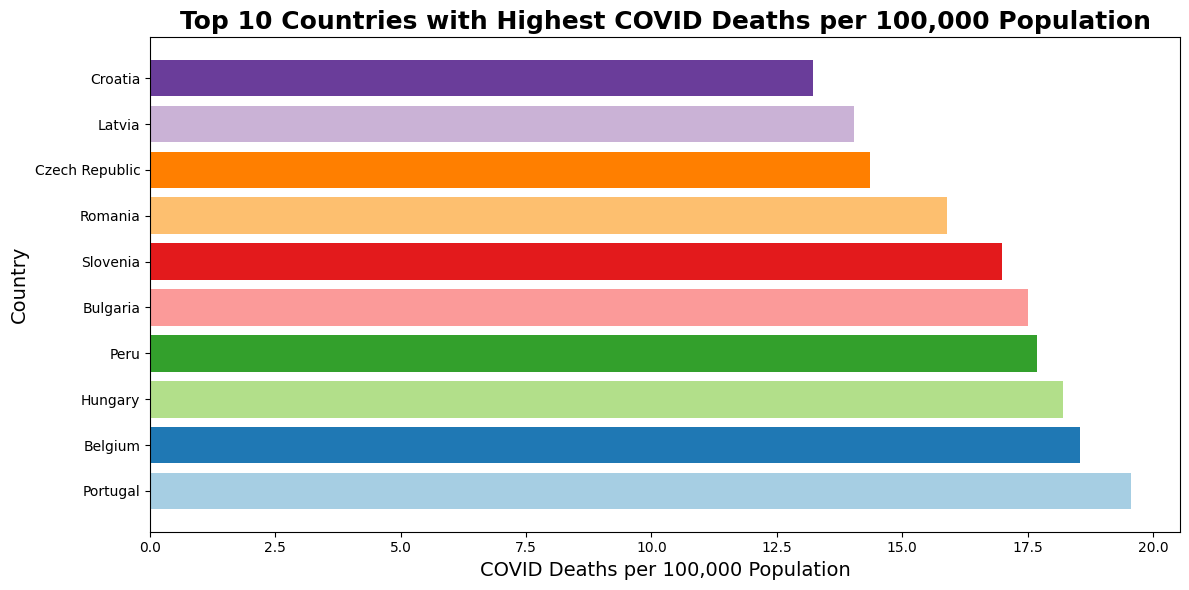

In [47]:
plt.figure(figsize=(12, 6))
plt.barh(top_10.index, top_10.values, color=plt.cm.Paired.colors)
plt.title('Top 10 Countries with Highest COVID Deaths per 100,000 Population', fontsize=18, fontweight='bold')
plt.xlabel('COVID Deaths per 100,000 Population', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

In [48]:
!pip install pycountry==22.3.5
import pycountry
import plotly.express as px

def get_iso_alpha(country):
    try:
        return pycountry.countries.get(name=country).alpha_3
    except:
        return None

df1['iso_alpha'] = df1['country'].apply(get_iso_alpha)
df1['excess_deaths_per_100k'] = (df1['excess_deaths'] / df1['population']) * 100000

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=4a5ae6153faa6594b1ed97162c02519722a70bd79e01dc234b46b7aceebd82ab
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [49]:
fig = px.choropleth(
    df1,
    locations="iso_alpha",
    color="excess_deaths_per_100k",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Excess Deaths per 100k Population"
)
fig.show()

In [52]:
df1['percentage_increase'] = (df1['total_deaths'] - df1['expected_deaths']) / df1['expected_deaths'] * 100

region_percentage_increase = df1.groupby('region')['percentage_increase'].mean().sort_values(ascending=False)
region_percentage_increase.head()

,percentage_increase
region,
Peru,48.954174
Ecuador,37.816181
Mexico,35.765028
Colombia,28.282425
Iran,28.164752


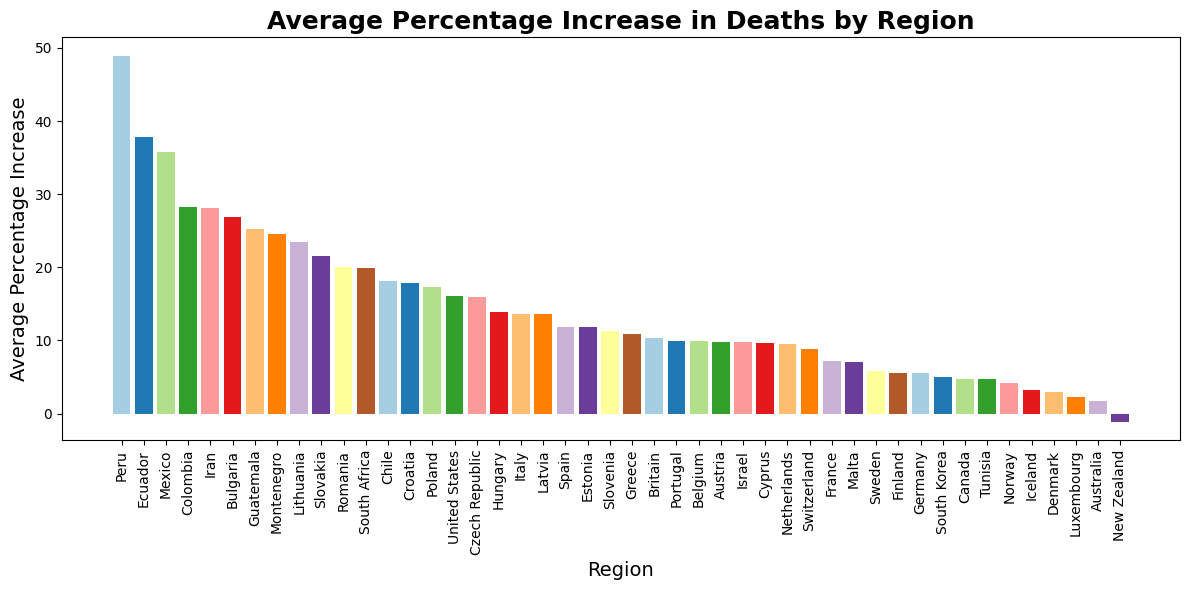

In [54]:
plt.figure(figsize=(12, 6))
plt.bar(region_percentage_increase.index, region_percentage_increase.values, color=plt.cm.Paired.colors)
plt.title('Average Percentage Increase in Deaths by Region', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Percentage Increase', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()